/tmp/ipykernel_57964/234452879.py:44: RuntimeWarning: overflow encountered in exp
  filtered_image = np.exp(filtered_image) - 1


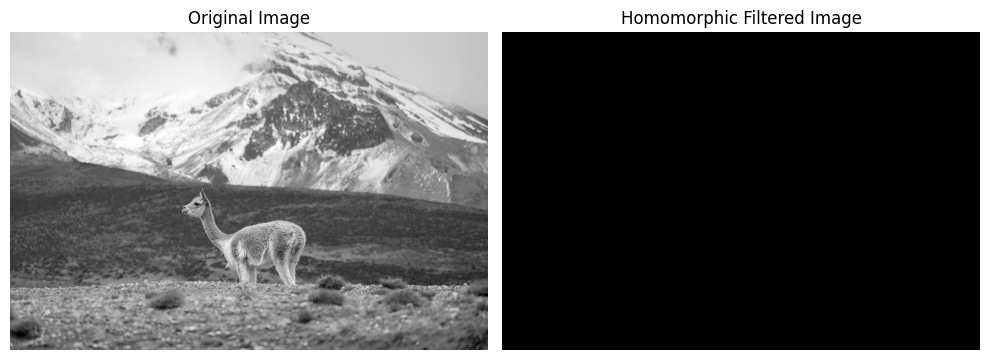

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('input.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply logarithmic transformation
log_image = np.log1p(np.array(gray_image, dtype="float") / 255)

# Compute the 2D DFT
dft = cv2.dft(np.float32(log_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Define the homomorphic filter parameters
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
gamma_h = 1.5
gamma_l = 0.5
c = 1
d0 = 20

# Create a Gaussian filter
gaussian_filter = np.zeros((rows, cols, 2), np.float32)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        gaussian_filter[i, j] = (gamma_h - gamma_l) * (1 - np.exp(-c * (distance ** 2) / (d0 ** 2))) + gamma_l

# Apply the filter to the shifted DFT
filtered_dft = dft_shift * gaussian_filter

# Shift back the zero-frequency component
filtered_dft_shift = np.fft.ifftshift(filtered_dft)

# Compute the inverse DFT
filtered_image = cv2.idft(filtered_dft_shift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Apply exponential transformation
filtered_image = np.exp(filtered_image) - 1
filtered_image = cv2.normalize(filtered_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Homomorphic Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the filtered image
plt.imsave('homomorphic_filtered_image.jpg', filtered_image, cmap='gray')